<a href="https://colab.research.google.com/github/AlcoholWolf/Pytion-Colab-Learn/blob/main/11/WaveNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch04.05 Wave Net

* 날짜:
* 이름:

## 학습내용
    - Audio data에 대해 이해한다.
    - 머신러닝 방법으로 접근하여 문제를 해결해 본다.
    - 딥러닝 네트워크를 이용해 문제를 해결한다.
    - waveNet, yamNet 등 딥러닝 알고리즘을 적용한다.



In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
!git clone https://github.com/AlcoholWolf/SDASSF

import sys

sys.path.append('./SDASSF/Prossece')

from GetAll import *

Cloning into 'SDASSF'...
remote: Enumerating objects: 128, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 128 (delta 4), reused 0 (delta 0), pack-reused 110
Receiving objects: 100% (128/128), 121.11 KiB | 3.56 MiB/s, done.
Resolving deltas: 100% (38/38), done.
Bot | Setting Set Other : Waring(Ignore)
Bot | Setting Set AddOn : Requests, Matplotlib(color, ToolKit-3D), Xgboost(Efficiency), Lightgbm(Lightening), Bs4
Bot | Setting Set AddOn-Sklearn : Sklearn(sk), Sklearn-AddOn(preprocessing, model_selection, tree, datasets, linear_model, metrics, svm, decomposition, ensemble, pipeline
Bot | Setting Set Bagic : Time, Random, Math
Bot | Setting Set Calqulrus : Numpy(np), Sklearn(sk)
Bot | Setting Set DataLoader : Pandas(pd), StatsModels(sm)
Bot | Setting Set Import : Shutil, tqdm, Glob, Librosa(Boice EDA)
Bot | Setting Set Show : Seaborn(sns), Matplotlib(plt=dark_backgraund, mpatches, mpl, plb)
Bot | Setting Set System : Os
B

In [11]:
'''lib.py
import tensorflow as tf
from tensorflow.keras import models, layers, utils, losses, optimizers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
'''

'lib.py\nimport tensorflow as tf\nfrom tensorflow.keras import models, layers, utils, losses, optimizers\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport pandas as pd\nimport seaborn as sns\n'

## 데이터셋 - Kaggle GTZAN Dataset 
---

https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification



### **| kaggle 데이터 연동**


1. kaggle 로그인 - my account - API Create New Api Token - `kaggle.json` 파일 다운로드
2. Drive에 저장해 놓는것을 권장
3. kaggle 패키지 다운로드
```
! pip install kaggle
```
4. 권한 변경
```
! chmod 600 `드라이브 파일 경로`
```
5. `~/` 위치에 복사
```
! cp `드라이브 파일 경로` ~/.kaggle/kaggle.json
```

6. 데이터셋 다운로드
```
! kaggle datasets download 데이터주소
```

In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#! chmod 600 /content/drive/MyDrive/scripts/kaggle.json

In [3]:
! mkdir ~/.kaggle/

In [4]:
! cp /content/drive/MyDrive/scripts/kaggle.json ~/.kaggle/kaggle.json

cp: cannot stat '/content/drive/MyDrive/scripts/kaggle.json': No such file or directory


In [5]:
! kaggle datasets download andradaolteanu/gtzan-dataset-music-genre-classification

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [6]:
! unzip /content/gtzan-dataset-music-genre-classification.zip

unzip:  cannot find or open /content/gtzan-dataset-music-genre-classification.zip, /content/gtzan-dataset-music-genre-classification.zip.zip or /content/gtzan-dataset-music-genre-classification.zip.ZIP.


### **| EDA**

In [ ]:
df = pd.read_csv('/content/archive/features_30_sec.csv')
print(df.shape)
df.head()

In [ ]:
# 예측해야할 클래스
class_count = df['label'].value_counts()
plt.title('Number per class')
_=sns.barplot(x=class_count.index , y=class_count.values)

In [ ]:
# 음성 파일의 길이
plt.title('Audio file length')
_=plt.hist(df['length'], log=True)

In [ ]:
# 특성 분포 
print('특성 개수', len(df.columns[2:-1]))
plt.figure(figsize=(20,18))
for i, col in enumerate(df.columns[2:-1]):
  plt.subplot(6,10, i+1)
  plt.title(col)
  plt.hist(df[col])

## 머신러닝 접근 방법 (features)
---

### **| 파라미터 추가**


### **| 전처리**


In [ ]:
# label encoding ( blues, classical, ... ) - > (0, 1, ...)
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['le_label'] = le.fit_transform(df['label'])
print(le.classes_)
df.head()

['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label,le_label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues,0
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues,0
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues,0
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues,0
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues,0


In [ ]:
x = df.drop(columns=['filename', 'length', 'label', 'le_label'])
y = df['le_label']
x.shape, y.shape

((1000, 57), (1000,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, stratify=y, random_state=0)
print('train', x_train.shape, y_train.shape)
print('test', x_test.shape, y_test.shape)

train (900, 57) (900,)
test (100, 57) (100,)


In [ ]:
# x 정규화
sc = preprocessing.StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train.shape, x_test.shape

((900, 57), (100, 57))

### **| 학습 - XGBoost**

In [ ]:
! pip install xgboost -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 255.9 MB 40 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=1000)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

Test Acc: 0.79


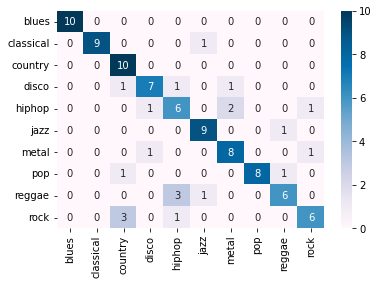

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
def show_result(model, x_test, y_test, proba=False):
  y_pred = model.predict(x_test)
  if proba: 
    y_pred = np.argmax(y_pred, axis=1)
  print('Test Acc:', accuracy_score(y_test, y_pred))
  #print(classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  _=sns.heatmap(cm, annot=True, cmap='PuBu', xticklabels=le.classes_, yticklabels=le.classes_)
show_result(xgb, x_test, y_test)

### **| 학습 - DNN**

In [ ]:
# 딥러닝 (Dense layer)
def build_dnn():
  x = layers.Input(shape=(57,))
  y = layers.Dense(1024, activation='relu')(x)
  y = layers.Dense(128, activation='relu')(y)
  y = layers.Dense(10, activation='softmax')(y)
  model = models.Model(x, y)
  return model

In [ ]:
dnn = build_dnn()
dnn.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 57)]              0         
                                                                 
 dense_15 (Dense)            (None, 1024)              59392     
                                                                 
 dense_16 (Dense)            (None, 128)               131200    
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 191,882
Trainable params: 191,882
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dnn.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
dnn.fit(x_train, y_train, epochs=15, batch_size=8)

Epoch 1/15
113/113 [==============================] - 0s 2ms/step - loss: 1.3138 - accuracy: 0.5278
Epoch 2/15
113/113 [==============================] - 0s 2ms/step - loss: 0.7545 - accuracy: 0.7433
Epoch 3/15
113/113 [==============================] - 0s 2ms/step - loss: 0.5628 - accuracy: 0.8167
Epoch 4/15
113/113 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8600
Epoch 5/15
113/113 [==============================] - 0s 2ms/step - loss: 0.2906 - accuracy: 0.9078
Epoch 6/15
113/113 [==============================] - 0s 2ms/step - loss: 0.2258 - accuracy: 0.9256
Epoch 7/15
113/113 [==============================] - 0s 2ms/step - loss: 0.1775 - accuracy: 0.9456
Epoch 8/15
113/113 [==============================] - 0s 2ms/step - loss: 0.1219 - accuracy: 0.9622
Epoch 9/15
113/113 [==============================] - 0s 2ms/step - loss: 0.2284 - accuracy: 0.9356
Epoch 10/15
113/113 [==============================] - 0s 2ms/step - loss: 0.1663 - accuracy: 0.9522

Test Acc: 0.79


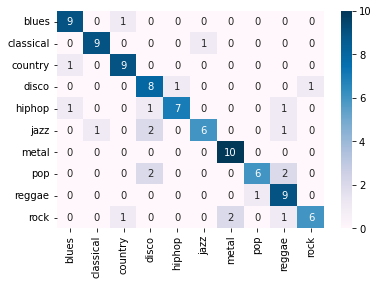

In [ ]:
show_result(dnn, x_test, y_test, proba=True)

## 딥러닝 접근 방법(Audio 원 데이터)
---